# Trabajo práctico final para la Materia Inteligencia Artificial - IUA - 2021

## Este trabajo tiene como finalidad aplicar los siguientes conceptos:

*   Regresión
*   Redes Neuronales
*   Árboles de Decisión
*   Modelos de Ensamble
*   Suport Vector Machines
*   Validación de Modelos


El trabajo se va a seguir realizando en grupos igual o menores de 3 participantes.

La fecha de entrega del mismo es 25 de noviembre del 2021.

Tener en cuenta que **este trabajo no reemplaza al examen final**, sino que va a *representar el 50% de la misma* (equivalente a la parte práctica del final).

**La nota de este trabajo se puede guardar hasta febrero del 2022.** Para finales posteriores a esa fecha, van a tener que realizar la parte práctica correspondiente en ese momento.











In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn import ensemble
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/melicaffa/practicos/main/Walmart_Store_sales.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])

## Descripción del Dataset

Este dataset presenta datos históricos de ventas de tiendas Walmart de Estados Unidos entre el periodo comprendido desde 05/2/2010 hasta 01/11/2012. Presenta las siguientes columnas:

**Store** - nro de tienda

**Date** - fecha

**Weekly_Sales** - ventas semanales en determinada tienda

**Holiday_Flag** - si dicha semana presenta alguna festividad: 1 – hay una festividad, 0 – no hay festividad

**Temperature** - temperatura en grados fahrenheit

**Fuel_Price** - costo del combustible en la región

**CPI** – Índice de precios al consumidor predominante

**Unemployment** - Tasa de desempleo predominante

In [3]:
# Visualizamos las columnas y sus respectivos tipos de datos
pd.DataFrame(dataset.dtypes, columns=['Type']).T

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Type,int64,datetime64[ns],float64,int64,float64,float64,float64,float64


In [4]:
# Visualizamos las estadísticas de las columnas
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
# Creamos más variables con los siguientes datos
dataset['Day'] = dataset['Date'].dt.day
dataset['Week'] = dataset['Date'].dt.week
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

/tmp/ipykernel_279/2458839394.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset['Week'] = dataset['Date'].dt.week


In [6]:
# Muestro 10 filas random para ver cómo son los datos
dataset.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
2035,15,2010-09-24,548542.47,0,62.53,2.837,132.761933,8.099,24,38,9,2010
5141,36,2012-09-14,301893.63,0,78.16,3.692,221.260121,6.623,14,37,9,2012
798,6,2011-09-09,1483574.38,1,80.21,3.546,217.398030,6.925,9,36,9,2011
2775,20,2011-03-18,1931668.64,0,44.80,3.631,207.428384,7.343,18,11,3,2011
6169,44,2010-06-25,288247.24,0,71.83,2.820,126.126600,7.972,25,25,6,2010


## Dividimos el dataset en Test y Train
### También separamos nuestra variable objetivo que van a ser Weekly_Sales

In [7]:
# Separamos Weekly_sales
dataset['Date'] = dataset['Date'].apply(lambda x : x.toordinal()) # Corrección necesaria para poder hacer regresión lineal sobre fechas como números, no datetime. Ver https://stackoverflow.com/questions/69186900/invalid-type-promotion-in-linear-regression-using-scikitlearn
y = dataset['Weekly_Sales']
X = dataset.iloc[:, dataset.columns != 'Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

In [8]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

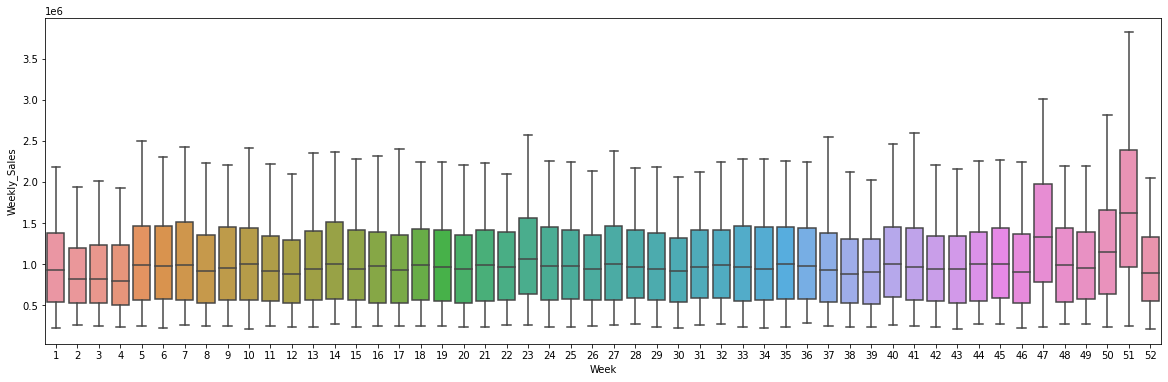

In [9]:
# Promedio de Ventas Semanales según semana del año
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=dataset, showfliers=False)

Las ventas semanales son bastantes similares a lo largo del año. 
Tienen poca varianza y sólo vemos grandes aumentos en 2 semanas especiales: **thanksgiving y Navidad**.

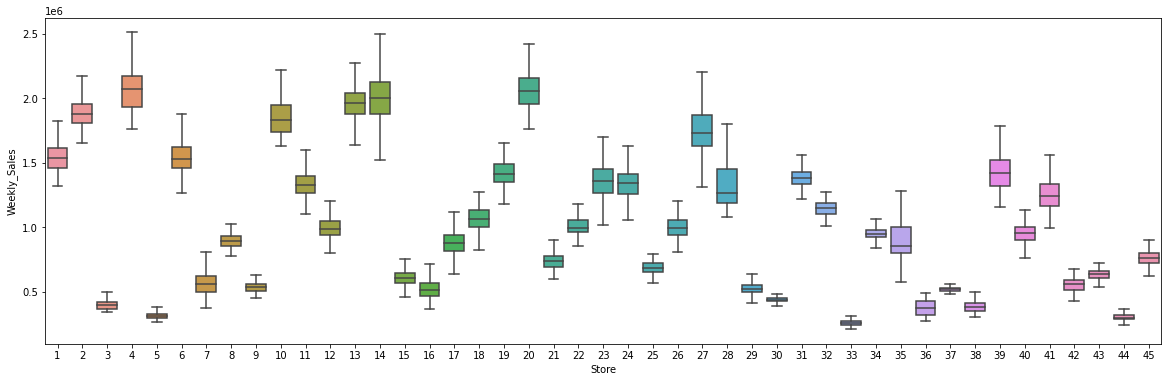

In [10]:
# Promedio de Ventas Semanales según Store
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Store', y="Weekly_Sales", data=dataset, showfliers=False)

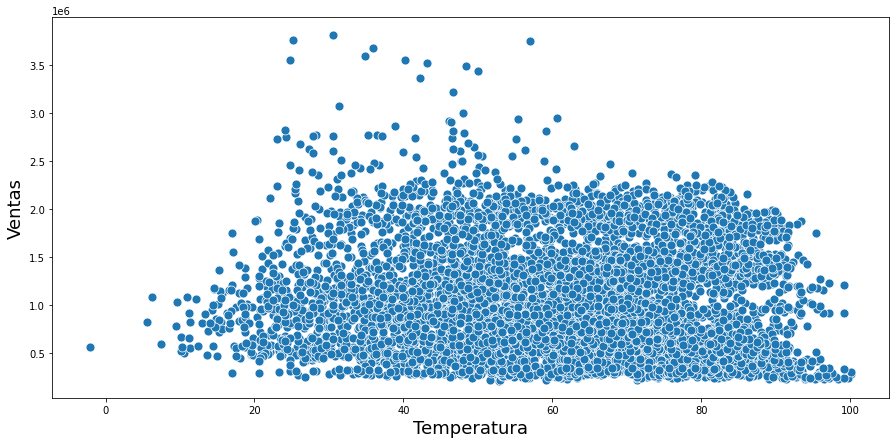

In [11]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=dataset.Temperature, y=dataset.Weekly_Sales, s=80);
sns.set_style('darkgrid')
plt.xlabel('Temperatura', fontsize=18)
plt.ylabel('Ventas', fontsize=18);

Holiday_Flag vs Weekly_Sales


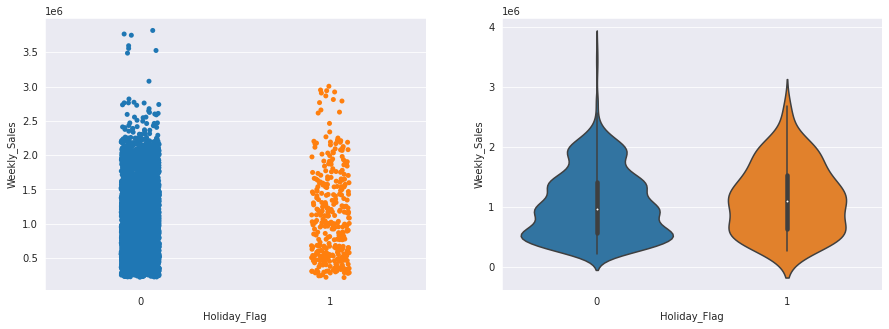

In [12]:
print('Holiday_Flag vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
#En Azul son los datos de Entrenamiento y en naranja los de Test
sns.stripplot(y=y_train,x=X_train['Holiday_Flag'])
plt.subplot(1,2,2)
sns.violinplot(y=y_test,x=X_test['Holiday_Flag']);

**Podemos ver que los datos de test y train se comportan de manera similar y son congruentes entre si.**

## Aplicación de Modelos de Aprendizaje Automático Supervisado

Se propone implementar diferentes modelos de regresión **para el dataset seleccionado**, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando distintos kernels para la regresión.
2. Árboles de Decisión. 
3. Random Forest.
4. Red neuronal.

En todos los casos verificar si los datos necesitan ser normalizados o no, y si tienen que utilizar todas las columnas o es necesario tomar sólo una que sea más representativa.

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación? Qué métricas utilizan para la elección?

**Elegir el modelo que consideren que mejor aplica a nuestro problema.**

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros.
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
   + Mean Absolute Error (MAE): Esta métrica de regresión es el valor medio de la diferencia absoluta entre el valor real y el valor predicho.
   + Mean Squared Error (MSE) : El error cuadrático medio (ECM) calcula el valor medio de la diferencia al cuadrado entre el valor real y el predicho para todos los puntos de datos. Todos los valores relacionados se elevan a la segunda potencia, por lo tanto, todos los valores negativos no se compensan con los positivos. 
   + R2 Score:  Esta métrica calcula cuán bien se adapta el modelo de regresión a los datos observados. 
     
- ¿Cuál consideran la métrica más apropiada para utilizar en nuestros modelos? ¿Por qué?

## Respuestas

En los siguientes bloques de esta notebook se puede ver el desarrollo de los distintos modelos y la evaluación de los mismos. En esta sección se hace un resúmen de lo mismo, para responder a las preguntas planteadas en el bloque de arriba.

* **De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación? Qué métricas utilizan para la elección?**

Usamos el MSE para evaluar los modelos, porque, debido a que se trata de una resta cuadrática entre el valor correcto y el predicho, penaliza más los valores más alejados del esperado, que se encuentran por encima de la unidad. En cambio, valores de error en las décimas no son gravemente penalizados, lo que tiene sentido. Porque al querer predecirse montos tan grandes de dinero como los de nuestro dataset, una diferencia de centésimas no es realmente relevante. Consideramos, luego de hacer las pruebas y en función de los resultados, que los mejores modelos son los que utilizan árboles. En particular, el modelo de Random Forest resulta mejor que un modelo simple de Árboles de decisión, si bien ambos son bastante buenos.

* **Con respecto a la evaluación de GridSearch: ¿Cuál consideran la métrica más apropiada para utilizar en nuestros modelos? ¿Por qué?**

Consideramos, como se planteó anteriormente, que el MSE es una buena métrica para evaluar los modelos, debido a la justificación presentada en la respuesta anterior. Sin emabrgo, para la evaluación de un modelo de forma aislada (sin compararlo con el rendimiento de otros modelos, o sea, lo contrario a lo que se hizo en la primer etapa de esta notebook), el R2 sería probablemente una métrica que sirva más para indicar en términos generales si el modelo es preciso (sin dar nociones de las magnitudes con las que mantiene dicha precisión al hacer predicciones), ya que un valor cercano a 1 nos indica un buen rendimiento.

Para el GridSearch se fue necesario reducir considerablemente los hiperparámetros usados, ya que sino el tiempo de cómputo se volvia demasiado alto. Por lo mismo, se descartaron los siguientes hiperparámetros para RandomForest:

* *max_depth*: no se considera porque con un valor None por defecto llegó al valor óptimo. Al limitarlo no se mejoraría el resultado, sino que se optimizaría el tiempo de ejecución

* *min_weight_fraction_leaf*: no se considera porque no se colocan distintos pesos a los atributos del dataset max_leaf_nodes no se considera porque con un valor None por defecto llegó al valor óptimo. Al limitarlo no se mejoraría el resultado, sino que se optimizaría el tiempo de ejecución

* *max_features*: no se considera para acelerar las pruebas hechas por grid search. Además, es una variable que no pesa tanto el modelo, ya que, según la documentación: "la busqueda de una partición no se detiene hasta encontrar al menos una partición válida de los datos, aún si esto implica usar más atributos que los indicados por max_features"

* *min_samples_split* y *min_samples_leaf*: no se consideran porque al evitarlas se acelera el proceso de GridSearch. Además,  su presencia no aporta mucho, ya que dan indicadores de cuándo generar nuevos nodos hojas en función de valore arbitrareos. En cambio, la variable *min_impurity_decrease* sirve para lo mismo, pero indica cuándo generar nuevos nodos hojas en función de una medida de impureza, que es más significativa que simples cantidades de muestras por nodo.

* *criterion*: se deja el por defecto (MSE) porque es el que se considera óptimo para evaluar los modelos en estos casos, y sino, probando con los otros criterios el GridSearch demora mucho en resolverse

#### Conclusión GridSearch

Podemos notar que gracias a grid search se logró mejorar ligeramente el regresor. Sin embargo la mejora fue mínima, lo que nos lleva a concluir que los valores por defecto que tiene el Random Forest son considerablemente buenos.

In [13]:
# Lista que almacenará los regresores probados, junto con su mejor puntaje, columnas usadas y otros datos dependiendo
# del modelo
best_regressors = []

### 1. SVM

SVM necesita que los datos se normalicen (ver https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)


#### SVR

In [14]:
## Usamos MSLE porque es útil para valores a predecir que crecen exponencialmente, como ventas -> https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # No se usa el kernel precomputed porque requiere matriz cuadrada, lo que implicaría sólo usar 11 muestras

# Guardar valores originales para bucle
X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

# Listas de kernels, puntajes y columnas removidas
# En orden. O sea, scores[0] se corresponde con la combinación left_cols[0], used_kernels[0]
scores = []
left_cols = []
used_kernels = []

# Probar distintas columnas y kernels
for col in X_train_original.columns:
  # Dejar solo una columna para probar
  X_train = X_train.iloc[:, X_train.columns == col]
  X_test = X_test.iloc[:, X_test.columns == col]
  # Probamos con varios kernels
  for kernel in kernels:
    regr = make_pipeline(StandardScaler(), svm.SVR(kernel=kernel))
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append(col)
    used_kernels.append(kernel)
    scores.append(mean_squared_error(y_test, y_pred))

  # Reiniciar train y test
  X_train = X_train_original
  X_test = X_test_original

# Promabos los kernels usando TODAS las columnas
for kernel in kernels:
  regr = make_pipeline(StandardScaler(), svm.SVR(kernel=kernel))
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  left_cols.append('all')
  used_kernels.append(kernel)
  scores.append(mean_squared_error(y_test, y_pred))

# Obtener la mejor combinación kernel, columna para la métrica usada
results = pd.DataFrame({'kernel': used_kernels, 'column used': left_cols, 'score': scores,
                        'model': ['SVR' for i in range(len(scores))]})
best = results.iloc[results['score'].idxmin()]
best_regressors.append(best)
# Mostrar resultados
best

kernel                        poly
column used                  Store
score          328257923233.073547
model                          SVR
Name: 1, dtype: object

#### NuSVR

In [15]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] # No se usa el kernel precomputed porque requiere matriz cuadrada, lo que implicaría sólo usar 11 muestras

# Guardar valores originales para bucle
X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

# Listas de kernels, puntajes y columnas removidas
# En orden. O sea, scores[0] se corresponde con la combinación left_cols[0], used_kernels[0]
scores = []
left_cols = []
used_kernels = []

# Probar distintas columnas y kernels
for col in X_train_original.columns:
  # Dejar solo una columna para probar
  X_train = X_train.iloc[:, X_train.columns == col]
  X_test = X_test.iloc[:, X_test.columns == col]
  # Probamos con varios kernels
  for kernel in kernels:
    regr = make_pipeline(StandardScaler(), svm.NuSVR(kernel=kernel))
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append(col)
    used_kernels.append(kernel)
    scores.append(mean_squared_error(y_test, y_pred))

  # Reiniciar train y test
  X_train = X_train_original
  X_test = X_test_original

# Promabos los kernels usando TODAS las columnas
for kernel in kernels:
  regr = make_pipeline(StandardScaler(), svm.NuSVR(kernel=kernel))
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  left_cols.append('all')
  used_kernels.append(kernel)
  scores.append(mean_squared_error(y_test, y_pred))

# Obtener la mejor combinación kernel, columna para la métrica usada
results = pd.DataFrame({'kernel': used_kernels, 'column used': left_cols, 'score': scores,
                        'model': ['NuSVR' for i in range(len(scores))]})
best = results.iloc[results['score'].idxmin()]
best_regressors.append(best)
# Mostrar resultados
best

kernel                        poly
column used                  Store
score          324858835006.716736
model                        NuSVR
Name: 1, dtype: object

### 2. Árboles de Decisión

In [16]:
# Guardar valores originales para bucle
X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

# Listas de puntajes y columnas removidas.
# regr_types almacena si el regresor estandariza o no la entrada, con los valores 'regr_norm' o 'regr_sin_norm'
# En orden. O sea, scores[0] se corresponde con left_cols[0]
scores = []
left_cols = []
regr_types = [] # 

# Lista de regresor con y sin normalización en la entrada, usado para iterar
regressors = {
    'regr_norm': make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=0)), 
    'regr_sin_norm': DecisionTreeRegressor(random_state=0)
    }

# Probar distintas columnas y con y sin normalización de la entrada
for col in X_train_original.columns:
  # Dejar solo una columna para probar
  X_train = X_train.iloc[:, X_train.columns == col]
  X_test = X_test.iloc[:, X_test.columns == col]
  # Probamos con y sin normalización
  for regr_type, regr in regressors.items():
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append(col)
    regr_types.append(regr_type)
    scores.append(mean_squared_error(y_test, y_pred))

  # Reiniciar train y test
  X_train = X_train_original
  X_test = X_test_original

# Promabos usando TODAS las columnas
for regr_type, regr in regressors.items():
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append("all")
    regr_types.append(regr_type)
    scores.append(mean_squared_error(y_test, y_pred))

# Obtener la mejor combinación kernel, columna para la métrica usada
results = pd.DataFrame({'type': regr_types, 'column used': left_cols, 'score': scores, 
                        'model': ['Decision Tree Regressor' for i in range(len(scores))]})
best = results.iloc[results['score'].idxmin()]
best_regressors.append(best)
# Mostrar resultados
best

type                         regr_norm
column used                        all
score               22579027901.406765
model          Decision Tree Regressor
Name: 22, dtype: object

### 3. Random Forest

In [17]:
# Guardar valores originales para bucle
X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

# Listas de puntajes y columnas removidas.
# regr_types almacena si el regresor estandariza o no la entrada, con los valores 'regr_norm' o 'regr_sin_norm'
# En orden. O sea, scores[0] se corresponde con left_cols[0]
scores = []
left_cols = []
regr_types = [] # 

# Lista de regresor con y sin normalización en la entrada, usado para iterar
regressors = {
    'regr_norm': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0)), 
    'regr_sin_norm': RandomForestRegressor(random_state=0)
    }

# Probar distintas columnas y con y sin normalización de la entrada
for col in X_train_original.columns:
  # Dejar solo una columna para probar
  X_train = X_train.iloc[:, X_train.columns == col]
  X_test = X_test.iloc[:, X_test.columns == col]
  # Probamos con y sin normalización de la entrada
  for regr_type, regr in regressors.items():
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append(col)
    regr_types.append(regr_type)
    scores.append(mean_squared_error(y_test, y_pred))

  # Reiniciar train y test
  X_train = X_train_original
  X_test = X_test_original

# Promabos usando TODAS las columnas
for regr_type, regr in regressors.items():
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    left_cols.append('all')
    regr_types.append(regr_type)
    scores.append(mean_squared_error(y_test, y_pred))

# Obtener la mejor combinación kernel, columna para la métrica usada
results = pd.DataFrame({'type': regr_types, 'column used': left_cols, 'score': scores, 
                        'model': ['Random Forest' for i in range(len(scores))]})
best = results.iloc[results['score'].idxmin()]
best_regressors.append(best)
# Mostrar resultados
best

type                    regr_norm
column used                   all
score          14945368794.461092
model               Random Forest
Name: 22, dtype: object

### 4. Redes Neuronales

#### Aclaración: 

Se hicieron varios tests con distintas cantidades de iteraciones máximas para que el modelo convergier. Se dejó el código con 200 iteraciones máximas porque en ningún caso convergió, y aún con 20.000 iteraciones (lo cual demoró 29 minutos en computarse), los resultados fueron considerablemente peores que con respecto a los demás modelos.

* 200 iteraciones -> 23,5
* 500 iteraciones -> 10
* 20000 iteraciones -> 0,30 (demoró 29 minutos)

No se probó sin estandarizar la entrada, porque lo recomendado es normalizar los datos antes de dárselos al modelo (ver https://scikit-learn.org/stable/modules/neural_networks_supervised.html?highlight=neuronal%20network#tips-on-practical-use)

In [18]:
#Valores originales
X_train_original = X_train.copy(deep=True)
X_test_original = X_test.copy(deep=True)

#Listado
scores = []
left_cols = []

for col in X_train_original.columns:
  # Dejar solo una columna para probar
  X_train = X_train.iloc[:, X_train.columns == col]
  X_test = X_test.iloc[:, X_test.columns == col]
  
  scaler = StandardScaler() 
  scaler.fit(X_train, y_train)
  X_train = scaler.transform(X_train) 
  X_test = scaler.transform(X_test)
  regr = MLPRegressor(random_state=1, max_iter=200).fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  left_cols.append(col)
  scores.append(mean_squared_error(y_test, y_pred))

  # Reiniciar train y test
  X_train = X_train_original
  X_test = X_test_original

# Rehacer con todas las columnas
scaler = StandardScaler() 
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
regr = MLPRegressor(random_state=1, max_iter=200).fit(X_train, y_train)
y_pred = regr.predict(X_test)
left_cols.append('all')
scores.append(mean_squared_error(y_test, y_pred))

# Reiniciar datos
X_train = X_train_original
X_test = X_test_original

results = pd.DataFrame({'column used': left_cols, 'score': scores, 'model': ['Redes Neuronales' for i in range(len(scores))]})
best = results.iloc[results['score'].idxmin()]
best_regressors.append(best)
# Mostrar resultados
best

/home/gugu/.local/share/virtualenvs/Final-TydzyHjU/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gugu/.local/share/virtualenvs/Final-TydzyHjU/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gugu/.local/share/virtualenvs/Final-TydzyHjU/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gugu/.local/share/virtualenvs/Final-TydzyHjU/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

column used                     all
score          1413222683849.876221
model              Redes Neuronales
Name: 11, dtype: object

### Elección del mejor modelo

<BarContainer object of 5 artists>

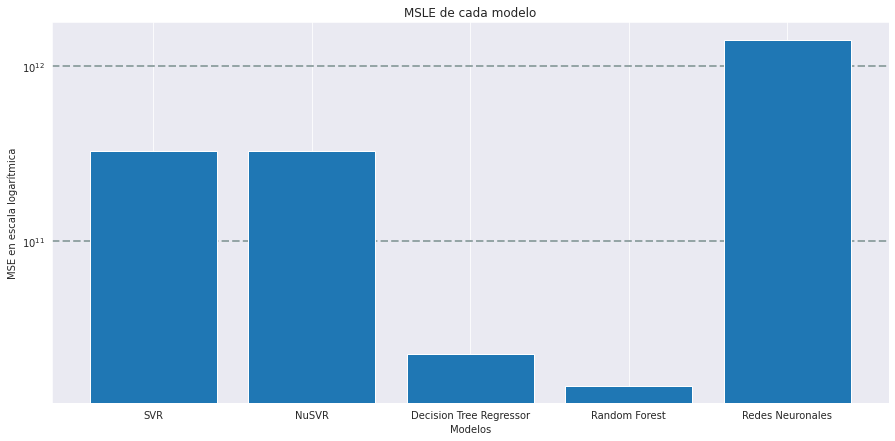

In [19]:
# Convertir lista de pd.Series a DatFrame para acceder los datos más facilmente
best_regr = pd.DataFrame(data=best_regressors, index=range(len(best_regressors)))
# Grafico de barras para visualizar resultados
# Mientras más bajo el error, mejor
plt.figure(figsize=(15,7))
plt.title('MSLE de cada modelo')
plt.xlabel('Modelos')
plt.ylabel('MSE en escala logarítmica')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y')
plt.yscale('log')
plt.bar(best_regr.model, best_regr.score)

In [20]:
# Imprimir por consola la configuración que usó el mejor modelo (columnas usadas y cosas como el kernel)
print("Configuración del mejor modelo:\n")
best_regr.iloc[best_regr['score'].idxmin()]

Configuración del mejor modelo:



kernel                        NaN
column used                   all
score          14945368794.461092
model               Random Forest
type                    regr_norm
Name: 3, dtype: object

### Evaluación de nuestro modelo elegido

Elegimos como métrica el MSE, porque penaliza más los errores que superan la unidad. Y el MAE no resulta útil porque no contamos con outliers dentro del dataset.

In [135]:
# GridSearch para obtener mejores hiperparámetros
# El mejor modelo fue el Random Forest, usando todas las columnas, y sin normalizar las entradas
## Ver arriba justificación de la selección de hiperparámetros
param_grid = {
    'min_impurity_decrease': [x*0.3 for x in range(0, 3)],
    'n_estimators': [x*100+10 for x in range(1, 5)],
    'min_impurity_decrease': [x*0.3 for x in range(0, 3)]
}
rf = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0, 0.3, 0.6],
                         'n_estimators': [110, 210, 310, 410]},
             verbose=2)

In [139]:
## Ahora evaluamos el mejor modelo
regr = make_pipeline(StandardScaler(), grid_search.best_estimator_)
regr.fit(X_train, y_train)

## Dataframe que contiene resultados para mostrarse más fácilmente
results = {
    'MAE': [],
    'MSE': [],
    'R2': [],
    'modelo': []
}

## Obtener predicción y métricas sobre entrenamiento
y_pred_train = regr.predict(X_train)
results['MAE'].append(mean_absolute_error(y_train, y_pred_train))
results['MSE'].append(mean_squared_error(y_train, y_pred_train))
results['R2'].append(r2_score(y_train, y_pred_train))
results['modelo'].append('Con GridSearch')

## Obtener predicción y métricas sobre test
y_pred_test = regr.predict(X_test)
results['MAE'].append(mean_absolute_error(y_test, y_pred_test))
results['MSE'].append(mean_squared_error(y_test, y_pred_test))
results['R2'].append(r2_score(y_test, y_pred_test))
results['modelo'].append('Con GridSearch')

In [140]:
## Obtener predicción y métricas sobre test y train, pero del modelo con hiperparámetros por defecto, para comparar

## Recreamos condiciones del mejor RandomForest obtenido en primera etapa
regr = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0)).fit(X_train, y_train)

## Obtener predicción y métricas sobre entrenamiento
y_pred_train = regr.predict(X_train)
results['MAE'].append(mean_absolute_error(y_train, y_pred_train))
results['MSE'].append(mean_squared_error(y_train, y_pred_train))
results['R2'].append(r2_score(y_train, y_pred_train))
results['modelo'].append('Sin GridSearch')

## Obtener predicción y métricas sobre test
y_pred_test = regr.predict(X_test)
results['MAE'].append(mean_absolute_error(y_test, y_pred_test))
results['MSE'].append(mean_squared_error(y_test, y_pred_test))
results['R2'].append(r2_score(y_test, y_pred_test))
results['modelo'].append('Sin GridSearch')

In [141]:
# Visualizamos resultados
df = pd.DataFrame(data=results, index=['sobre train', 'sobre test', 'sobre train', 'sobre test'])
df

,MAE,MSE,R2,modelo
sobre train,22251.161994,1.696244e+09,0.994658,Con GridSearch
sobre test,62049.046334,1.445640e+10,0.954985,Con GridSearch
sobre train,22443.248424,1.787644e+09,0.994370,Sin GridSearch
sobre test,62567.442781,1.494537e+10,0.953462,Sin GridSearch
